# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Описание данных

Предоставлен файл (real_estate.csv) с находящимся в нем архивом объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

## План работы

О качестве данных ничего не известно, кроме того, что одна часть информации была указана пользователями самостоятельно, другая - получена автоматически на основе картографических данных (например, расстояние до центра, аэропорта, ближайшего парка и водоёма).

Мы проверим данные на ошибки и оценим их влияние на исследование; затем, на этапе предобработки поищем возможность исправить самые критичные ошибки. Далее проведем расчеты, на основании которых проанализируем данные и выявим параметры, влияющие на ценообразование квартиры.

Таким образом, исследование пройдёт в четыре этапа:

- Обзор данных
- Предобработка данных
- Расчеты
- Исследовательский анализ данных

## Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 50) 
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

***Наблюдается не корректность в наименованиях столбцов таблицы и типов данных.   
Приведём наименование столбцов к единому стилю:***

In [5]:
data = data.rename(columns=
{'cityCenters_nearest': 'city_centers_nearest', 
'parks_around3000': 'parks_around_3000', 
'ponds_around3000': 'ponds_around_3000', 
'studio': 'is_studio', 
'open_plan': 'is_open_plan'})

***Выведем исправленный полный список наименований столбцов:***

In [6]:
for column in data:
    print(column)

total_images
last_price
total_area
first_day_exposition
rooms
ceiling_height
floors_total
living_area
floor
is_apartment
is_studio
is_open_plan
kitchen_area
balcony
locality_name
airports_nearest
city_centers_nearest
parks_around_3000
parks_nearest
ponds_around_3000
ponds_nearest
days_exposition


*****Описание данных:*****

-	total_images — число фотографий квартиры в объявлении
-	last_price — цена на момент снятия с публикации
-	total_area — общая площадь квартиры в квадратных метрах (м²)
-	first_day_exposition — дата публикации
-	rooms — число комнат
-	ceiling_height — высота потолков (м)
-	floors_total — всего этажей в доме
-	living_area — жилая площадь в квадратных метрах (м²)
-	floor — этаж
-	is_apartment — апартаменты (булев тип)
-	is_studio — квартира-студия (булев тип)
-	is_open_plan — свободная планировка (булев тип)
-	kitchen_area — площадь кухни в квадратных метрах (м²)
-	balcony — число балконов
-	locality_name — название населённого пункта
-	airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
-	citycenters_nearest — расстояние до центра города (м)
-	parks_around_3000 — число парков в радиусе 3 км
-	ponds_nearest — расстояние до ближайшего водоёма (м)
-	ponds_around_3000 — число водоёмов в радиусе 3 км
-	parks_nearest — расстояние до ближайшего парка (м)
-	days_exposition — сколько дней было размещено объявление (от публикации до снятия)

***Построим общую гистограмму для всех числовых столбцов данной таблицы:***

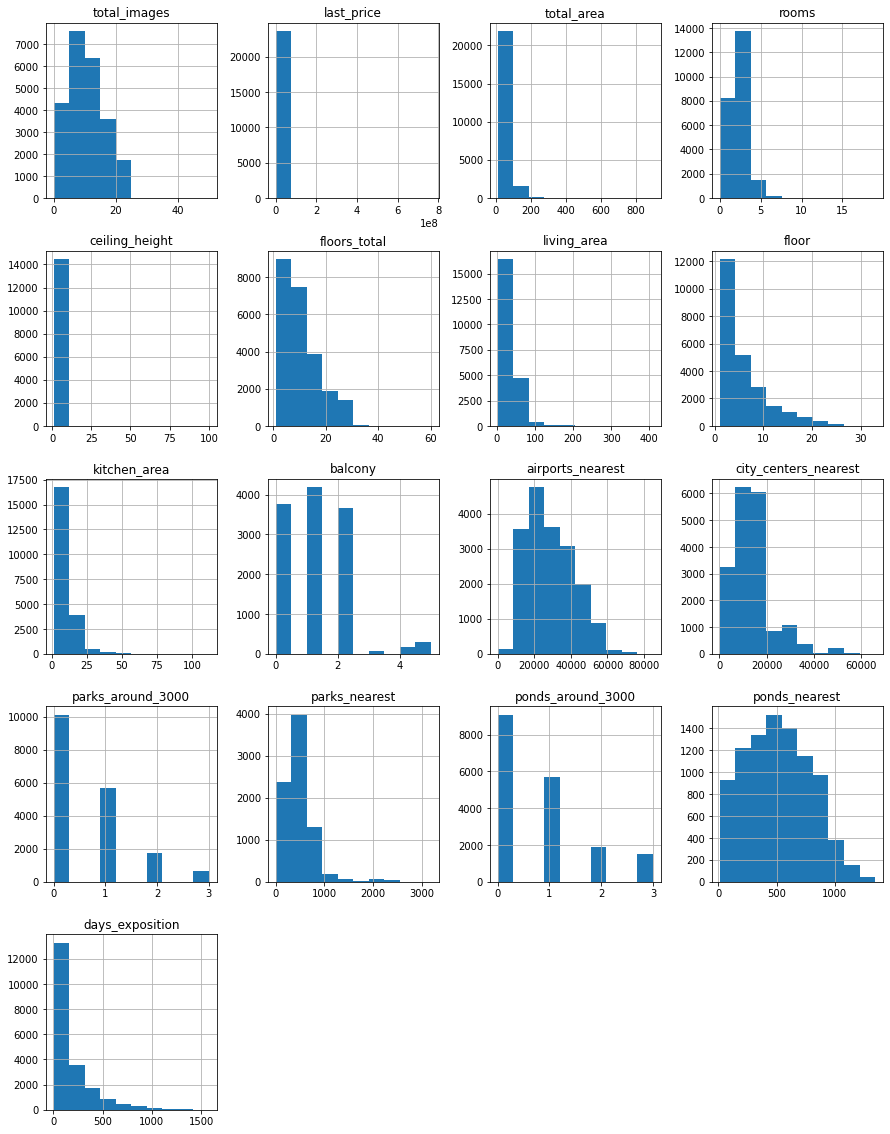

In [7]:
data.hist(figsize=(15, 20))
None

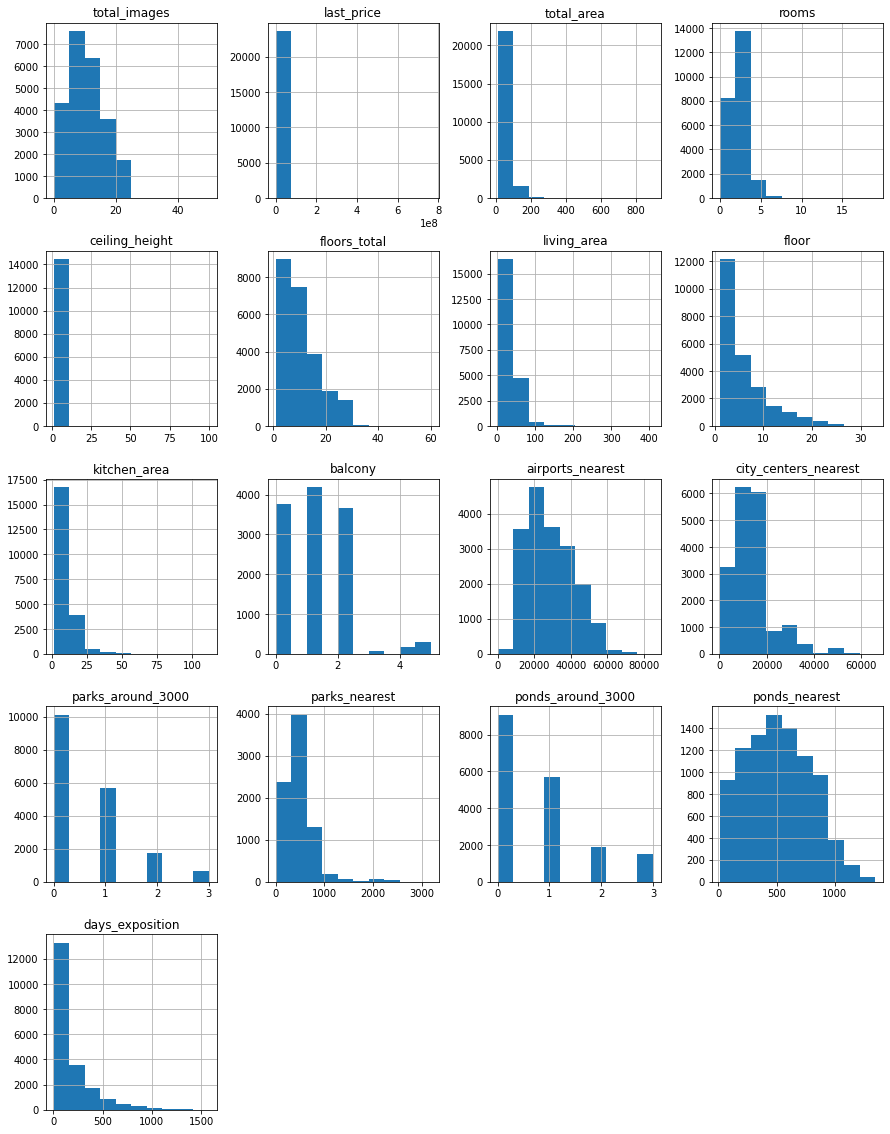

In [8]:
# Код ревьюера

data.hist(figsize=(15, 20))
None

***Выводы:***  
***В каждой строке таблицы — данные из архива объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. Выявлены и исправленны нарушения стиля в названиях колонок. Построена гистограмма для всех числовых столбцов данной таблицы. Чтобы двигаться дальше, нужно будет выявить и устранить проблемы в данных.***

### Проведём предобработку данных

***Проверим нашу таблитцу на наличие пропусков и дубликатов.***

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
is_studio                   0
is_open_plan                0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
data.duplicated().sum()

0

***Выясним также процент пропущенных данных по каждому столбцу.***

In [11]:
(data.isna().sum() / len(data)).round(4) * 100

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height          38.80
floors_total             0.36
living_area              8.03
floor                    0.00
is_apartment            88.29
is_studio                0.00
is_open_plan             0.00
kitchen_area             9.61
balcony                 48.61
locality_name            0.21
airports_nearest        23.38
city_centers_nearest    23.29
parks_around_3000       23.28
parks_nearest           65.91
ponds_around_3000       23.28
ponds_nearest           61.56
days_exposition         13.42
dtype: float64

*****Наличие дубликатов не выявлено. Выявлены пропуски в столбцах и процент их присутствия.*****  

In [12]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


*****Приведём в соответстие тип данных представленных в таблице.*****  

In [13]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
is_studio                  bool
is_open_plan               bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around_3000       float64
parks_nearest           float64
ponds_around_3000       float64
ponds_nearest           float64
days_exposition         float64
dtype: object

***Пропуски в значениях количества балконов заполним "0".***

In [14]:
data['last_price'] = data['last_price'].astype(int)
data['balcony'] = data['balcony'].fillna(0).astype(int)

*****При первичном анализе данных наблюдаются аномальные значения в том числе, такие как: высота потолка до 100 метров и 60-ти этажный дом. В целом предоставленная картина реалистично, но требует дополнительного анализа. Рассмотрим каждый столбец на соответствие его типу данных и на аномальные значения. Приведены в соответствие представленные типы данных.*****

<font size="4"><font color=blue>Число фотографий квартиры в объявлении (total_images)</font>

In [15]:
data['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

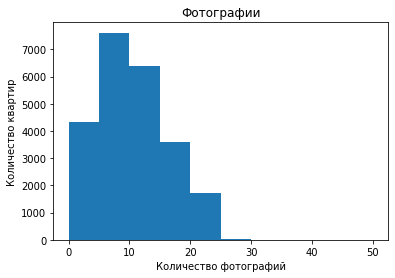

In [16]:
plt.hist(data['total_images'], bins=10, range=(0,50))
plt.title('Фотографии')
plt.xlabel('Количество фотографий')
plt.ylabel('Количество квартир')
plt.show()

***Самое распростроненное количество фотографий это от 5 до 10 в одном объявлении. Пропусков в значениях количества фотографий нету, но есть объявления с нулевым количеством фотографий. Посчитаем их количество.***

In [17]:
foto_div = (data['total_images'] == 0).sum()/data['total_images'].sum()*100
print('Количество объявлений без фотографий', (data['total_images'] == 0).sum(), ', что составляет',"%1.2f " % foto_div,'%')

Количество объявлений без фотографий 1059 , что составляет 0.45  %


***Самое распростроненное количество фотографий это от 5 до 10 в одном объявлении. Пропусков в значениях количества фотографий нету, но есть объявления с нулевым количеством фотографий. Количество объявлений без фотографий 1054, что составляет 0.45%.***

<font size="4"><font color=blue>Цена на момент снятия с публикации (last_price)</font>

In [18]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

***Средняя цена - в районе 6,5 млн. руб.; максимальная цена - 763 млн., минимальная - 12 тыс. рублей. Изучим далее аномальные значения по стоимости квартир.***

In [19]:
data[data['last_price'] < 100000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


***Двухкомнатная квартира и с большой кухней не может стоить 12 тысяч рублей. Скорее всего ошибка и стоимость данной квартиры составляет 12 млн. рублей. Заменим стоимость данной квартиры увеличив её в 1000 раз.***

In [20]:
data['last_price'] = data['last_price'].replace(12190, 12190000)

***Рассмотрим квартиры стоимостью более 100 млн. рублей.***

In [21]:
data[data['last_price'] > 100000000] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
793,20,135000000,310.0,2018-05-22T00:00:00,4,3.30,5.0,250.00,2,NaN,False,False,50.00,0,Санкт-Петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,342.0
1026,20,155000000,310.0,2018-10-12T00:00:00,5,5.30,3.0,190.00,3,NaN,False,False,63.00,2,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1188,20,118000000,290.6,2018-06-01T00:00:00,6,3.82,6.0,188.70,3,NaN,False,False,22.00,1,Санкт-Петербург,25309.0,6224.0,1.0,217.0,0.0,NaN,316.0
1300,14,120000000,280.0,2018-07-12T00:00:00,5,4.70,4.0,162.00,3,NaN,False,False,30.00,0,Санкт-Петербург,24680.0,4247.0,1.0,464.0,3.0,339.0,225.0
1436,19,330000000,190.0,2018-04-04T00:00:00,3,3.50,7.0,95.00,5,NaN,False,False,40.00,0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
1928,11,125000000,224.5,2017-01-24T00:00:00,4,NaN,4.0,163.50,3,False,False,False,30.00,1,Санкт-Петербург,22805.0,2335.0,0.0,NaN,2.0,497.0,174.0
2243,9,130278280,304.0,2015-07-24T00:00:00,5,3.11,9.0,NaN,7,NaN,False,False,NaN,0,Санкт-Петербург,25593.0,5913.0,2.0,164.0,0.0,NaN,599.0
2536,16,159984000,242.4,2015-08-27T00:00:00,4,3.85,9.0,131.00,7,NaN,False,False,20.00,0,Санкт-Петербург,21946.0,2242.0,1.0,679.0,1.0,227.0,501.0
3117,19,140000000,631.0,2019-03-30T00:00:00,7,NaN,5.0,NaN,5,NaN,False,False,60.00,0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
4996,20,124000000,124.5,2017-10-12T00:00:00,4,3.00,4.0,67.20,2,False,False,False,20.00,0,Санкт-Петербург,20399.0,1722.0,3.0,302.0,3.0,172.0,45.0


***Из полученной таблицы выделяется квартира стоимость 763 млн.рублей. Стоимость таких элитных квартир может быть необаснованно завышена. Целесообразно убрать из списка квартиры стоимостью более 100000000 рублей. Предварительно проверим процент удаляемых выбросов.*** 

In [22]:
(len(data[data['last_price'] > 100000000])) / len(data['last_price'])*100

0.15612473100130808

***Процент удаляемых выбросов 0.15%, что значительно меньше допустимых 10%.***

In [23]:
data = data.query('last_price < 100000000')

In [24]:
# Код ревьюера

low_percentele = 0.01
hihg_percentele = 0.99

last_price_low = data['last_price'].quantile(low_percentele)
last_price_high = data['last_price'].quantile(hihg_percentele)

print(f'Нижняя граница last_price {last_price_low}')
print(f'Верхняя граница last_price {last_price_high}')

print(
    'Процент отброшенных значений = ',
    round(
        100 - len(data.query('@last_price_low <= last_price <= @last_price_high'))
        / len(data['last_price']) * 100,
        2
    ),
    '%'
)

Нижняя граница last_price 1000000.0
Верхняя граница last_price 33616999.99999983
Процент отброшенных значений =  1.95 %


<font size="4"><font color=blue>Общая площадь квартиры в квадратных метрах (total_area), (м²)</font>

In [25]:
data['total_area'].describe()

count    23662.000000
mean        59.928048
std         33.471517
min         12.000000
25%         40.000000
50%         52.000000
75%         69.600000
max        590.000000
Name: total_area, dtype: float64

***Проанализируем срез квартир с площадью в диапазоне от 20 до 200 кв.м.***

***Вывод: Больше всего квартир с площадью 52 кв.м. Пропусков нет.***

<font size="4"><font color=blue>Дата публикации (first_day_exposition)</font>

***Приведём данные в столбце даты публикации (first_day_exposition) при помощи метода to_datetime(), который переводит строки в даты. Проверим за какой период предоставлены данные.***

In [26]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
display(data['first_day_exposition'].min(), data['first_day_exposition'].max())


Timestamp('2014-11-27 00:00:00')

Timestamp('2019-05-03 00:00:00')

***Данные предоставлены за период с 27 ноября 2014 по 3 мая 2019 годов.***

<font size="4"><font color=blue>Число комнат (rooms)</font>

***Проверим, какой весь спектр количества комнат представленно в данной таблице***

In [27]:
data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 14, 15, 16, 19])

***Странным является присутствие в таблице квартир с "0" нулевым значением количества комнат. Проверим их количество.***

In [28]:
print('Количество объявлений с "0" нулевым значением количества комнат":', (data['rooms'] == 0).sum())

Количество объявлений с "0" нулевым значением количества комнат": 197


***Обоснованно будем считать ошибкой "0" значение количества комнат и минимальное значение количество комнат равно "1". Поменяем значение количества комнат в таблице с "0" на "1".***

In [29]:
data['rooms'] = data['rooms'].replace(0, 1)
data['rooms'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 14, 15, 16, 19])

***Интересно рассмотреть список квартир с количеством комнат более 10.***

In [30]:
data[data['rooms'] > 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
648,3,17500000,183.7,2018-07-01,11,3.40,7.0,138.8,7,NaN,False,False,13.3,0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
866,5,25000000,363.0,2017-12-23,14,3.16,5.0,222.0,4,NaN,False,False,16.6,0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
5358,20,65000000,590.0,2019-02-14,15,3.50,6.0,409.0,3,NaN,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
9688,8,33000000,194.1,2017-02-07,11,3.43,5.0,129.0,2,NaN,False,False,11.9,0,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0
14498,6,32250000,374.6,2018-06-09,19,NaN,5.0,264.5,2,NaN,False,False,27.6,0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18848,6,28500000,270.0,2015-03-02,16,3.00,4.0,180.0,4,NaN,False,False,13.0,1,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
20829,6,28659000,245.4,2016-03-31,14,NaN,4.0,168.3,2,NaN,False,False,25.9,0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0


***В принципе с увеличением количества комнат наблюдаем и увеличение общей площади квартиры. Что выглядит вполне реалистично. Странно наличие в списке квартир с таким большим количеством комнат. Но это может быть связанно с наличием в этих объявлениях и предложениях по продаже домов.***

<font size="4"><font color=blue>Высота потолков (ceiling_height), (м)</font>

***Посмотрим на количество пропусков в значениях высоты потолка квартир.***

In [31]:
data['ceiling_height'].isnull().sum()

9183

***По нормам СанПин минимальная высота потолка может достигать 2.5 метра.***

In [32]:
print('Количество квартир с высотой потолка менее 2.5 метра:', data[data['ceiling_height'] < 2.5]['ceiling_height'].count()) 
print('Количество квартир с высотой потолка более 5 метров:', data[data['ceiling_height'] > 5]['ceiling_height'].count()) 

Количество квартир с высотой потолка менее 2.5 метра: 73
Количество квартир с высотой потолка более 5 метров: 34


***Заменим в квартирах с низким уровнем потолка на значение 2.5 метра.***

In [33]:
data.loc[data['ceiling_height'] < 2.5, 'ceiling_height'] = 2.5

***Изучим список квартир с значением высоты потолка более 10 метров.***

In [34]:
data[data['ceiling_height'] > 10] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
355,17,3600000,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,False,False,NaN,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000,75.0,2018-11-12,3,32.0,3.0,53.0,2,NaN,False,False,8.0,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000,45.0,2018-02-01,2,25.0,9.0,30.0,2,NaN,False,False,7.0,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000,25.0,2017-09-27,1,27.0,25.0,17.0,17,NaN,False,True,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,False,False,5.5,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000,54.0,2017-10-13,2,27.0,5.0,30.0,3,NaN,False,False,9.0,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000,50.0,2017-08-08,2,26.0,9.0,21.3,3,NaN,False,False,7.0,2,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000,80.0,2019-01-09,2,27.0,36.0,41.0,13,NaN,False,False,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000,44.4,2019-03-25,2,25.0,5.0,31.3,5,NaN,False,False,5.7,0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000,42.0,2017-03-26,3,25.0,5.0,30.0,2,NaN,False,False,5.2,0,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


***Проанализировав данный срез таблицы можно прийти к выводу, что начиная с высоты 20 метров при заполнении данных ошиблись на порядок. Заменим данные, которые превышают 20 метров, уменьшив их в 10 раз.***

In [35]:
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] = (data['ceiling_height'] / 10)
print('Количество квартир с высотой потолка выше 10 метров:', (data['ceiling_height'] > 10).sum())

Количество квартир с высотой потолка выше 10 метров: 3


***Заменим пропуски медианным значением высоты потолка. И проверим еще раз на наличие пропусков.*** 

In [36]:
med = data['ceiling_height'].median()
print(med)
data['ceiling_height'] = data['ceiling_height'].fillna(med)

2.65


***Удалим квартиры высота которых и после внесенных изменений превышает 5 метров.***

In [37]:
data = data.query('ceiling_height < 5')

 ***Наблюдаем преобладание квартир с высотой потолка 2.65 м.***

<font size="4"><font color=blue>Всего этажей в доме (floors_total)</font>

***Ранее наблюдали наличие пропусков в столбце всего этажей в здании. В столбце этажа квартиры наличие пропусков не указано. Заменим значение количество этажей в здании на соответствующий этаж квартиры.***

In [38]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])

***«Князь Александр Невский», построенный холдингом «РосСтройИнвест», на сегодняшний день является самым высоким жилым домом Санкт-Петербурга. Его высота составляет 126 м. Здание состоит из 37 этажей, два из которых подземные.https://spbhomes.ru/science/civilizaciya-na-neve-studii-v-dome-biznes-klassa/  
Посмотрим на список квартир из нашей таблицы с указанием этажа выше 37.***

In [39]:
data[data['floors_total'] > 37]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
2253,12,3800000,45.5,2018-06-28,2,2.88,60.0,27.4,4,NaN,False,False,7.4,0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3978000,40.0,2018-09-24,1,2.65,52.0,10.5,18,NaN,False,False,14.0,0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


***Удаляем из списка квартиры с несуществующими данными по этажности.***

In [40]:
data = data[data['floors_total'] <= 37]
print('Количество пропусков в значениях этажей в здании:', data['floors_total'].isnull().sum())

Количество пропусков в значениях этажей в здании: 0


***Приведём этажность зданий к целочисленному типу.***

In [41]:
data['floors_total'] = data['floors_total'].astype(int)
data['floors_total'].dtypes

dtype('int64')

***Провели заполнение пропусков и удалили артефакты. Привели этажность к целочисленному значению.***

<font size="4"><font color=blue>Жилая площадь в квадратных метрах (living_area), (м²)</font>

***Выведем количество пропусков в значениях жилой площади квартир.***

In [42]:
data['living_area'].isnull().sum()

1895

***Ранее мы определили, что отсутствуют пропуски в значениях общей площади квартир. Очевидно, что чем больше площадь квартиры, тем больше жилая площадь. Получив отношение среднего значения жилой площади к среднему значению площади общей, можно использовать этот коэффициент для пропорционального определения значения по каждой квартире. И заполнить этими значениями пропуски в столбце жилой площади.***

In [43]:
liv = data['living_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(liv * data['total_area'], inplace=True)
print('Количество пропусков в значениях жилой площади:', data['living_area'].isnull().sum())

Количество пропусков в значениях жилой площади: 0


***Мы устранили пропуски в значених жилой площади.***

<font size="4"><font color=blue>Этаж (floor)</font>

In [44]:
data['floor'].describe()

count    23646.000000
mean         5.892413
std          4.886352
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

  ***Наблюдаем преобладание квартир с 1-го по 5-ый этаж. Самый распространенный 4-й этаж. Это скорее всего говорит о квартирах в пятиэтажках. Но это можно проверить позже.***

<font size="4"><font color=blue>Апартаменты (is_apartment) (булев тип) </font>

***Если в объявлении данная квартира апартаменты, то в таблице будет отражено значение True. В данном столбце мы наблюдали значительное количество пропусков и их однозначно можно отнести к отсутствие к данной квартире критерия апартаменеты. Заменим пропуски на значение False.*** 

In [45]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)

***Приведём данный тип данных на булев у столбца. Проверим какие варианты значений представлены в этом столбце.***

In [46]:
data['is_apartment'] = data['is_apartment'].astype('bool') 
data['is_apartment'].unique()

array([False,  True])

***Выясним какое количество в таблице квартир апартаментов.***

In [47]:
data['is_apartment'].value_counts()

False    23597
True        49
Name: is_apartment, dtype: int64

<font size="4"><font color=blue>Квартира-студия (is_studio) (булев тип)</font>

***Выясним какое количество в таблице квартир-студий. Пропущенных значений мы в этом столбце не наблюдали.***

In [48]:
data['is_studio'].value_counts()

False    23498
True       148
Name: is_studio, dtype: int64

<font size="4"><font color=blue>Свободная планировка (is_open_plan) (булев тип)</font>

***Выясним какое количество в таблице квартир со свободной планировкой. Пропущенных значений мы в этом столбце не наблюдали.***

In [49]:
data['is_open_plan'].value_counts()

False    23579
True        67
Name: is_open_plan, dtype: int64

<font size="4"><font color=blue>Площадь кухни в квадратных метрах (kitchen_area), (м²)</font>

***Рассмотрим заполнение пропусков площади кухни по аналогии с заполнением пропусков значений жилой площади. Ранее мы определили, что отсутствуют пропуски в значениях общей площади квартир. Очевидно, что чем больше площадь квартиры, тем больше площадь кухни. Получив отношение среднего значения площади кухни к среднему значению площади общей, можно использовать этот коэффициент для пропорционального определения значения по каждой квартире. И заполнить этими значениями пропуски в столбце жилой площади.***

In [50]:
kit = data['kitchen_area'].mean() / data['total_area'].mean()
data['kitchen_area'].fillna(kit * data['total_area'], inplace=True)
print('Количество пропусков в значениях площади кухни:', data['kitchen_area'].isna().sum())

Количество пропусков в значениях площади кухни: 0


In [51]:
data['kitchen_area'].describe()

count    23646.000000
mean        10.455268
std          5.831302
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

***Самые распространённые кухни площадью от 5 до 15 кв.метров.***

<font size="4"><font color=blue>Число балконов (balcony)</font>

***Ранее мы заполнили пропуски в значениях числа балконов в квартирах на "0". Выясним количество квартир с балконами и без них.***

In [52]:
data['balcony'].describe()

count    23646.000000
mean         0.591009
std          0.958466
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

In [53]:
print('Количество квартир с балконом:', (data['balcony'] > 0).sum())
print('Количество квартир без балкона:', (data['balcony'] == 0).sum())

Количество квартир с балконом: 8407
Количество квартир без балкона: 15239


<font size="4"><font color=blue>Название населённого пункта (locality_name)</font>

***Рассмотрим перечень уникальных значений в столбце названий населенных пунктов, в которых находятся квартиры.***

In [54]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

***Изучим внимательно перечень населенных пунктов на наличие дублирующихся названий. В указаниях населенного пункта используется "поселок" и "посёлок". Это приводит к дублированию в названиях. Заменим все буквы "ё" на "е".***

In [55]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')        
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Виллози', 'городской поселок Лесогорский',
       'городской поселок Мга', 'городской поселок Назия',
       'городской поселок Новоселье', 'городской поселок Павлово',
       'городской поселок Рощино', 'городской поселок Свирьстрой',
       'городской поселок Советский', 'городской поселок Фед

***Заметили дублирование названий 'поселок Рябово' и 'поселок городского типа Рябово'. Произведем замену. И посчитаем количество пропусков в названиях населенного пункта.***

In [56]:
data['locality_name'] = data['locality_name'].replace('поселок Рябово', 'поселок городского типа Рябово')
data['locality_name'].isnull().sum()

49

***Расстояние от центра Санкт-Петербурга до его границ не превышает 18 км. Значит, если квартира находиться ближе к центру города чем 18 км, то в пропусках её расположения можно указать город Санкт-Петербург. Оставшиеся пропуски удалим.***

In [57]:
data.loc[data['city_centers_nearest'] < 18000, 'locality_name'].fillna('Санкт-Петербург')
data = data.dropna(subset=['locality_name']) 
print('Количество квартир в Санкт-Петербурге:', (data['locality_name'] == 'Санкт-Петербург').sum())
print('Количество квартир за пределами Санкт-Петербурга:', (data['locality_name'] != 'Санкт-Петербург').sum())

Количество квартир в Санкт-Петербурге: 15672
Количество квартир за пределами Санкт-Петербурга: 7925


In [58]:
data['locality_name'].value_counts()

Санкт-Петербург        15672
поселок Мурино           556
поселок Шушары           440
Всеволожск               398
Пушкин                   369
                       ...  
деревня Мануйлово          1
поселок Семиозерье         1
деревня Кисельня           1
деревня Пельгора           1
поселок Дружноселье        1
Name: locality_name, Length: 329, dtype: int64

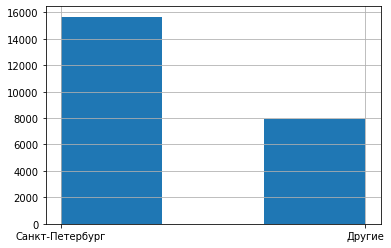

In [59]:
data.loc[data['locality_name'] == 'Санкт-Петербург', 'locality'] = 'Санкт-Петербург'
data['locality'] = data['locality'].fillna('Другие')
data['locality'].hist(bins=3)
plt.show()

***Провели исследование в анализе названий населенных пунктов. Убрали дублирование и провели заполнение пропусков. 
Остальные артефакты бали удалены. Подмечено, что в этих объявлениях о продаже квартир присутствуют 15672 по квартирам из 
Санкт-Петербурга и 7925 из других ближайших населенных пунктов за пределами города.***

<font size="4"><font color=blue>Расстояние до ближайшего аэропорта в метрах (airports_nearest), (м)</font>

***На наличие пропусков в данных значениях мы пока обращать внимание не будем.*** 

In [60]:
data['airports_nearest'].describe()

count    18066.000000
mean     28809.265969
std      12647.493141
min          0.000000
25%      18557.000000
50%      26765.500000
75%      37319.750000
max      84869.000000
Name: airports_nearest, dtype: float64

***Посмотрим на список квартир находящихся в радиусе 1 км от аэропорта.***

In [61]:
data[data['airports_nearest'] < 1000] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality
21085,0,7000000,34.7,2018-09-23,1,2.7,9,19.8,3,False,False,False,6.0,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0,Санкт-Петербург


***Наличие квартиры с нулевым расстоянием до аэропорта считаем ошибкой и удаляем эту строчку.***

In [62]:
data = data.loc[data['airports_nearest'] != 0]

<font size="4"><font color=blue>Расстояние до центра города (citycenters_nearest), (м)</font>

***На наличие пропусков в данных значениях мы пока обращать внимание не будем.*** 

In [63]:
data['city_centers_nearest'].describe()

count    18088.000000
mean     14217.883016
std       8600.491412
min        181.000000
25%       9289.000000
50%      13118.500000
75%      16296.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<font size="4"><font color=blue>Число парков в радиусе 3 км (parks_around_3000)</font>

***Приведём число парков к целочисленному типу. Наличие пропусков в значениях числа парков будем считать за их отсутствие в радиусе 3 км и заменим нулевым значением "0".***

In [64]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(value=0).astype(int)
data['parks_around_3000'].dtypes

dtype('int64')

In [65]:
data['parks_around_3000'].describe()

count    23596.000000
mean         0.466986
std          0.746008
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64

<font size="4"><font color=blue>Расстояние до ближайшего водоёма (ponds_nearest), (м)</font>

***На наличие пропусков в данных значениях мы пока обращать внимание не будем.*** 

In [66]:
data['ponds_nearest'].describe()

count    9044.000000
mean      518.828284
std       277.943715
min        13.000000
25%       295.000000
50%       503.000000
75%       731.250000
max      1344.000000
Name: ponds_nearest, dtype: float64

<font size="4"><font color=blue>Число водоёмов в радиусе 3 км (ponds_around_3000)</font>

***Приведём количество число водоёмов к целочисленному типу. Наличие пропусков в значениях числа водоёмов будем считать за их отсутствие в радиусе 3 км и заменим нулевым значением "0".***

In [67]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(value=0).astype(int)
data['ponds_around_3000'].dtypes

dtype('int64')

In [68]:
data['ponds_around_3000'].describe()

count    23596.000000
mean         0.587896
std          0.881221
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64

***Значительное количество квартир находятся дальше 3 км от водоема. Но есть и квартиры с 3 водоемами поблизости.***

<font size="4"><font color=blue>Расстояние до ближайшего парка (parks_nearest), (м)</font>

***На наличие пропусков в данных значениях мы пока обращать внимание не будем.*** 

In [69]:
data['parks_nearest'].describe()

count    8027.000000
mean      491.190607
std       343.009248
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

***Наблюдаем, что в среднем квартиры находятся на расстоянии 450 метров от парка.***

<font size="4"><font color=blue>Сколько дней было размещено объявление (days_exposition) (от публикации до снятия)</font>

***На наличие пропусков в данных значениях мы пока обращать внимание не будем.*** 

In [70]:
data['days_exposition'].describe()

count    20423.000000
mean       180.482936
std        219.597126
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

***Мы выяснили, что медианное время продажи - 95 дней, а среднее время продажи - 180 дней.***

In [71]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
is_studio                   0
is_open_plan                0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5531
city_centers_nearest     5508
parks_around_3000           0
parks_nearest           15569
ponds_around_3000           0
ponds_nearest           14552
days_exposition          3173
locality                    0
dtype: int64

<font size="5"><font color=blue>Вывод:</font>
    
<font size="4"><font color=blue>Мы определили, что датафрейм содержит объявления о продаже недвижимости в Санкт-Петербурге и области за период с 27 ноября 2014 по 3 мая 2019 годов. Резкий рост продаж начался с февраля 2017 года. Мы убрали артефакты, частично заполнили пропуски в данных, изменили формат столбцов.
    
- Выяснили, что средняя цена в объявлениях около 6,5 млн. руб.  
- Самые распространенные квартиры с площадью 52 кв.м. 
- Наблюдаем также, что преобладают квартиры с высотой потолка 2.65 м. 
- Самые распространённые кухни площадью от 5 до 15 кв.метров. 
- Мы выяснили, что медианное время продажи - 95 дней.</font>

### Посчитаем и добавим в таблицу новые столбцы

<font size="4"><font color=blue>Добавим в таблицу столбец с ценой одного квадратного метра<font size="4"><font color=blue>

In [72]:
data['price_to_m'] = data['last_price'] / data['total_area']
data['price_to_m'].describe()

count     23596.000000
mean      98546.500112
std       42895.631451
min        7962.962963
25%       76561.874073
50%       94960.409866
75%      114086.870215
max      848484.848485
Name: price_to_m, dtype: float64

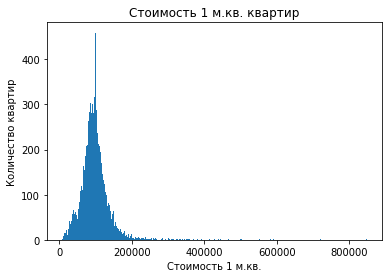

In [73]:
plt.hist(data['price_to_m'], bins=1000)
plt.title('Стоимость 1 м.кв. квартир')
plt.xlabel('Стоимость 1 м.кв.')
plt.ylabel('Количество квартир')
plt.show()

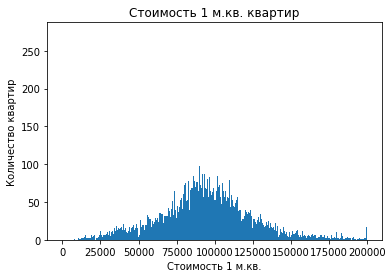

In [74]:
plt.hist(data['price_to_m'], bins=1000, range=(0,200000))
plt.title('Стоимость 1 м.кв. квартир')
plt.xlabel('Стоимость 1 м.кв.')
plt.ylabel('Количество квартир')
plt.show()

<font size="4"><font color=blue>Добавим в таблицу столбец с указанием дня недели публикации объявления (0 — понедельник, 1 — вторник и так далее)</font>

In [75]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday  
print(data['weekday_exposition'].sort_values().unique())

[0 1 2 3 4 5 6]


<font size="4"><font color=blue>Добавим в таблицу столбец с указанием месяца публикации объявления</font>

In [76]:
data['month_exposition'] = data['first_day_exposition'].dt.month   
print(data['month_exposition'].sort_values().unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]


<font size="4"><font color=blue>Добавим в таблицу столбец с указанием года публикации объявления</font>

In [77]:
data['year_exposition'] = data['first_day_exposition'].dt.year 
print(data['year_exposition'].sort_values().unique()) 

[2014 2015 2016 2017 2018 2019]


<font size="4"><font color=blue>Добавим в таблицу столбец с указанием типа этажа квартиры (значения — «первый», «последний», «другой»)</font>

In [78]:
data['floor_type'] = ['other']*len(data)
data.loc[data['floor'] == 1, 'floor_type'] = 'first'
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'last'
print(data['floor_type'].sort_values().unique())

['first' 'last' 'other']


<font size="4"><font color=blue>Добавим расстояние до центра города в километрах (переведём из м в км и округлим до целых значений)..</font>

In [79]:
data['city_centers_nearest_km'] = (data['city_centers_nearest']/1000).round()
data['city_centers_nearest_km'].describe()

count    18088.000000
mean        14.211687
std          8.608308
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: city_centers_nearest_km, dtype: float64

<font size="4"><font color=blue>Мы добавили в таблицу объявлений новые столбцы, чтобы нам это помогло в дальнейшем исследовании выявить новые закономерности и особенности.</font>

### Проведём исследовательский анализ данных

<font size="4"><font color=blue>1.	Изучим следующие параметры объектов:</font> 
-	общая площадь;
-	жилая площадь;
-	площадь кухни;
-	цена объекта;
-	количество комнат;
-	высота потолков;
-	этаж квартиры;
-	тип этажа квартиры («первый», «последний», «другой»);
-	общее количество этажей в доме;
-	расстояние до центра города в метрах;
-	расстояние до ближайшего аэропорта;
-	расстояние до ближайшего парка;
-	день и месяц публикации объявления.
    
Построим отдельные гистограммы для каждого из этих параметров и опишем наблюдения по параметрам в ячейке с типом markdown.

<font size="4"><font color=blue>Цена на момент снятия с публикации (last_price)</font>

In [80]:
data['last_price'].describe()

count    2.359600e+04
mean     6.245230e+06
std      6.404787e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.625770e+06
75%      6.750000e+06
max      9.900000e+07
Name: last_price, dtype: float64

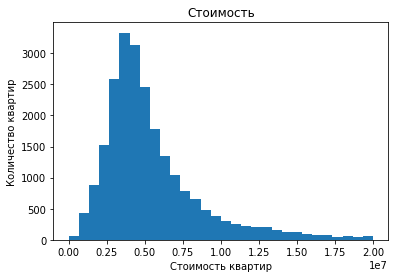

In [81]:
plt.hist(data['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость')
plt.xlabel('Стоимость квартир')
plt.ylabel('Количество квартир')
plt.show()

<font size="4"><font color=blue>Общая площадь квартиры в квадратных метрах (total_area), (м²)</font>

In [82]:
data['total_area'].describe()

count    23596.000000
mean        59.886824
std         33.374926
min         12.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        590.000000
Name: total_area, dtype: float64

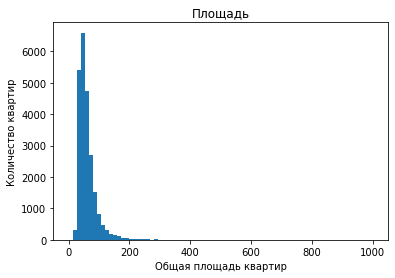

In [83]:
plt.hist(data['total_area'], bins=75, range=(0,1000))
plt.title('Площадь')
plt.xlabel('Общая площадь квартир')
plt.ylabel('Количество квартир')
plt.show()

***Проанализируем срез квартир с площадью в диапазоне от 20 до 200 кв.м.***

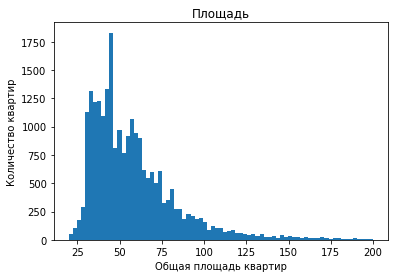

In [84]:
plt.hist(data['total_area'], bins=75, range=(20,200))
plt.title('Площадь')
plt.xlabel('Общая площадь квартир')
plt.ylabel('Количество квартир')
plt.show()

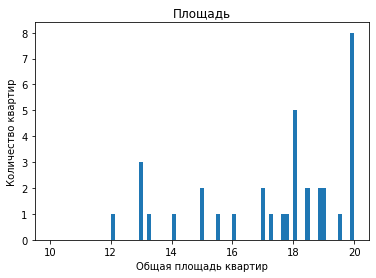

Количество квартир с площадью не более 20 кв.м.: 35


In [85]:
plt.hist(data['total_area'], bins=75, range=(10,20))
plt.title('Площадь')
plt.xlabel('Общая площадь квартир')
plt.ylabel('Количество квартир')
plt.show()
print('Количество квартир с площадью не более 20 кв.м.:', (data['total_area'] <= 20).sum())

***Вывод: Больше всего квартир с площадью 45 кв.м. Так же плотность есть в районе с 30 до 45. После есть подъем в районе 60 кв.м., но их почти в два раза меньше чем квартир с площадью 45 кв.м. Потом количество квартир в объявлениях плавно снижается при уменьшении их площади. Интересно рассмотреть квартиры с площадью менее 20 кв.м.***

<font size="4"><font color=blue>Дата публикации (first_day_exposition)</font>

Timestamp('2014-11-27 00:00:00')

Timestamp('2019-05-03 00:00:00')

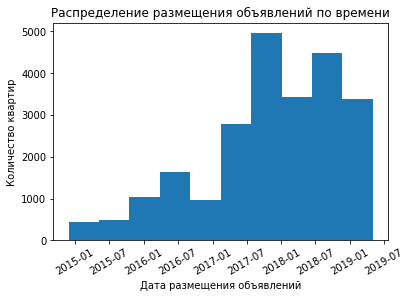

In [86]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
display(data['first_day_exposition'].min(), data['first_day_exposition'].max())

plt.hist(data['first_day_exposition'])
plt.xticks(rotation=30)
plt.xlabel('Дата размещения объявлений')
plt.ylabel('Количество квартир')
plt.title('Распределение размещения объявлений по времени')
plt.show()

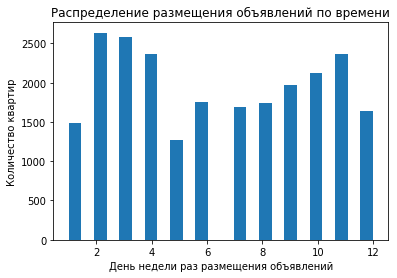

In [87]:
plt.hist(data['month_exposition'], bins=24)
plt.xlabel('День недели раз размещения объявлений')
plt.ylabel('Количество квартир')
plt.title('Распределение размещения объявлений по времени')
plt.show()

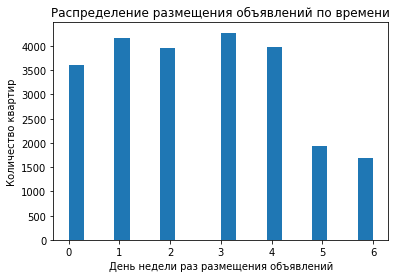

In [88]:
plt.hist(data['weekday_exposition'], bins=20)
plt.xlabel('День недели раз размещения объявлений')
plt.ylabel('Количество квартир')
plt.title('Распределение размещения объявлений по времени')
plt.show()

***Данные предоставлены за период с 27 ноября 2014 по 3 мая 2019 годов. Резкий рост продаж начался с февраля 2017 года. Самыми распространенными днями в подаче объявлений в неделе это вторник и четверг. В выходные заметно снижается количество публикаций.
Самый высокий по количеству публикаций это февраль. И постепенно к лету количество публикаций снижается. С сентября уже активно начинаются увеличиваться публикации. Но декабрь и январь уже месяцы значительного снижения активности продавцов квартир.***

<font size="4"><font color=blue>Число комнат (rooms)</font>

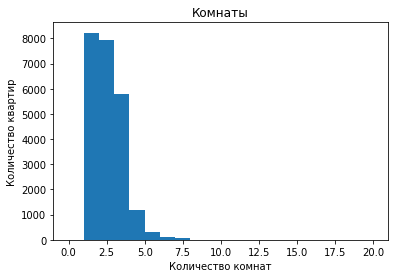

In [89]:
plt.hist(data['rooms'], bins=20, range=(0,20))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

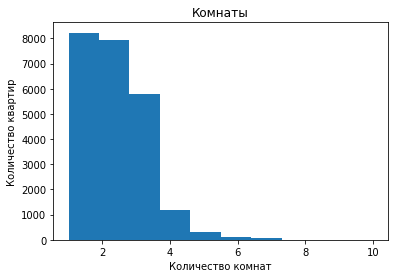

In [90]:
plt.hist(data['rooms'], bins=10, range=(1,10))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

***Чем меньше комнат в квартире, тем она дешевле и более востребованна. Гистограмма подтверждает преимущество по количеству объявлений о продаже однокомнатных квартир.***

<font size="4"><font color=blue>Высота потолков (ceiling_height), (м)</font>

In [91]:
data.loc[data['ceiling_height'] < 2.5, 'ceiling_height'] = 2.5

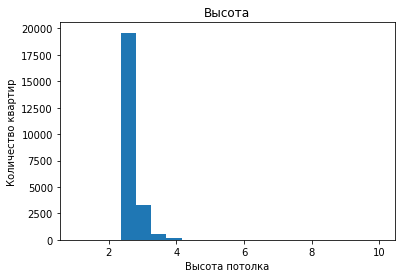

In [92]:
plt.hist(data['ceiling_height'], bins=20, range=(1,10))
plt.title('Высота')
plt.xlabel('Высота потолка')
plt.ylabel('Количество квартир')
plt.show()

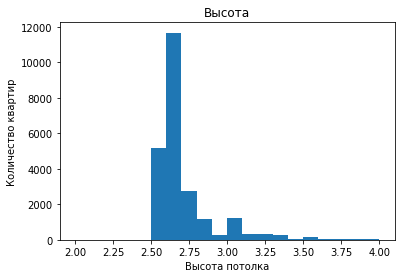

In [93]:
plt.hist(data['ceiling_height'], bins=20, range=(2,4))
plt.title('Высота')
plt.xlabel('Высота потолка')
plt.ylabel('Количество квартир')
plt.show()

 ***Наблюдаем преобладание квартир с высотой потолка 2.65 м. Следом по количеству идут квартиры с вывсотой потолка 2.5 м.***

<font size="4"><font color=blue>Всего этажей в доме (floors_total)</font>

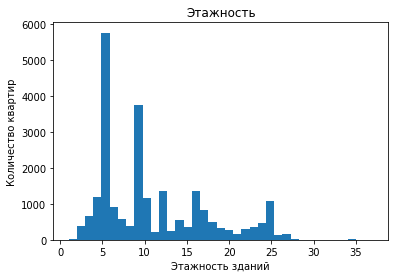

In [94]:
plt.hist(data['floors_total'], bins=37, range=(1,37))
plt.title('Этажность')
plt.xlabel('Этажность зданий')
plt.ylabel('Количество квартир')
plt.show()

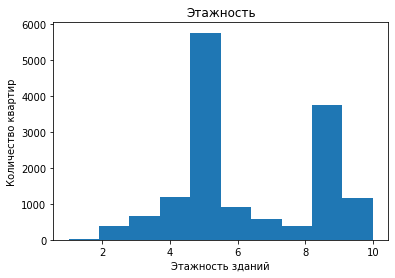

In [95]:
plt.hist(data['floors_total'], bins=10, range=(1,10))
plt.title('Этажность')
plt.xlabel('Этажность зданий')
plt.ylabel('Количество квартир')
plt.show()

***Заметно по гистограмме значительное преобладание 5-этажных зданий. Наследие Хрущева. 
И 9-этажных зданий. Наследие Брежневских времён.***

<font size="4"><font color=blue>Жилая площадь в квадратных метрах (living_area), (м²)</font>

In [96]:
data['living_area'].describe()

count    23596.000000
mean        34.338725
std         21.280579
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        409.000000
Name: living_area, dtype: float64

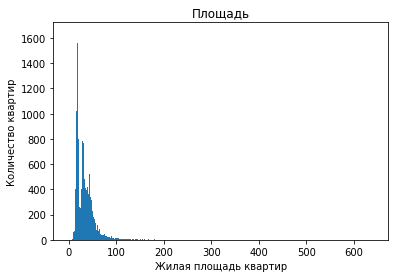

In [97]:
plt.hist(data['living_area'], bins=640, range=(0,640))
plt.title('Площадь')
plt.xlabel('Жилая площадь квартир')
plt.ylabel('Количество квартир')
plt.show()

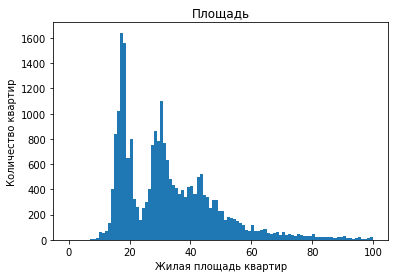

In [98]:
plt.hist(data['living_area'], bins=100, range=(0,100))
plt.title('Площадь')
plt.xlabel('Жилая площадь квартир')
plt.ylabel('Количество квартир')
plt.show()

***Мы устранили пропуски в значених жилой площади. Гистограмма демонстрирует максимальное количество квартир с жилой площадью около 18 кв.м. Опять Хрущевское наследие. Это значение жилой площади распространенных "Хрущевских однушек".***

<font size="4"><font color=blue>Этаж (floor)</font>

In [99]:
data['floor'].describe()

count    23596.000000
mean         5.893457
std          4.884485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

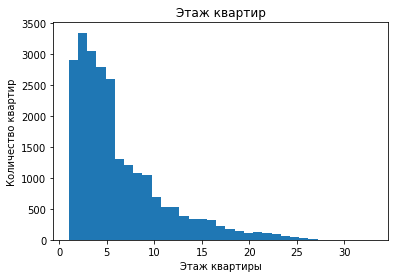

In [100]:
plt.hist(data['floor'], bins=33, range=(1,33))
plt.title('Этаж квартир')
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество квартир')
plt.show()

***Наблюдаем преобладание квартир с 1-го по 5-ый этаж. Это скорее всего говорит о квартирах в пятиэтажках. Но это можно проверить позже.***

<font size="4"><font color=blue>Апартаменты (is_apartment) (булев тип) </font>

***Выясним какое количество в таблице квартир апартаментов.***

In [101]:
data['is_apartment'].value_counts()

False    23547
True        49
Name: is_apartment, dtype: int64

<font size="4"><font color=blue>Квартира-студия (is_studio) (булев тип)</font>

***Выясним какое количество в таблице квартир-студий. Пропущенных значений мы в этом столбце не наблюдали.***

In [102]:
data['is_studio'].value_counts()

False    23448
True       148
Name: is_studio, dtype: int64

<font size="4"><font color=blue>Свободная планировка (is_open_plan) (булев тип)</font>

***Выясним какое количество в таблице квартир со свободной планировкой. Пропущенных значений мы в этом столбце не наблюдали.***

In [103]:
data['is_open_plan'].value_counts()

False    23529
True        67
Name: is_open_plan, dtype: int64

<font size="4"><font color=blue>Площадь кухни в квадратных метрах (kitchen_area), (м²)</font>

In [104]:
data['kitchen_area'].describe()

count    23596.000000
mean        10.451915
std          5.828216
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

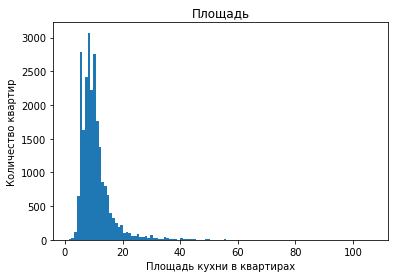

In [105]:
plt.hist(data['kitchen_area'], bins=112)
plt.title('Площадь')
plt.xlabel('Площадь кухни в квартирах')
plt.ylabel('Количество квартир')
plt.show()

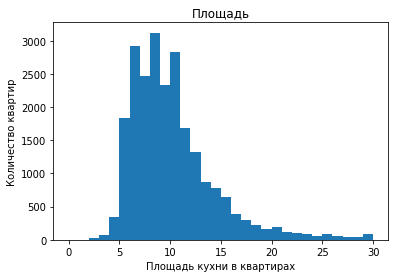

In [106]:
plt.hist(data['kitchen_area'], bins=30, range=(0,30))
plt.title('Площадь')
plt.xlabel('Площадь кухни в квартирах')
plt.ylabel('Количество квартир')
plt.show()

***Самые распространённые кухни площадью от 5 до 15 кв.метров. Кухни площадью более 15 кв.метров встречаются все реже. Кухни площадью более 30 кв.метров уже являются редкостью.***

<font size="4"><font color=blue>Рассмотрим соотношение стоимости квартир и типа этажа квартиры (значения — «первый», «последний», «другой»:</font>

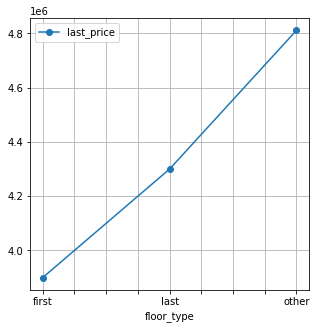

In [107]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

***Наблюдаемая картина подтверждает, что неохотно покупают квартиры на 1 этаже и поэтому их стоимость ниже аналогичных. Следом идут квартиры на последнем этаже. И остальные квартиры уже по стоимости дороже квартир на первом и последнем этажах.***

<font size="4"><font color=blue>Расстояние до ближайшего аэропорта в метрах (airports_nearest), (м)</font>

In [108]:
data['airports_nearest'].describe()

count    18065.000000
mean     28810.860725
std      12646.026611
min       6450.000000
25%      18557.000000
50%      26766.000000
75%      37322.000000
max      84869.000000
Name: airports_nearest, dtype: float64

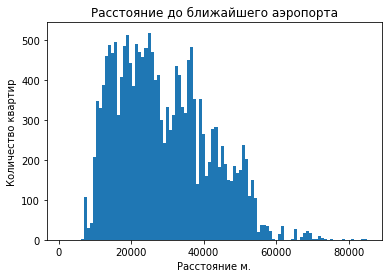

In [109]:
plt.hist(data['airports_nearest'], bins=100, range=(1000,85000))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние м.')
plt.ylabel('Количество квартир')
plt.show()

***В среднем квартиры из данных объявлений находятся на расстоянии около 29 км до ближайшего аэропорта.***

<font size="4"><font color=blue>Расстояние до центра города (citycenters_nearest), (м)</font>

In [110]:
data['city_centers_nearest'].describe()

count    18088.000000
mean     14217.883016
std       8600.491412
min        181.000000
25%       9289.000000
50%      13118.500000
75%      16296.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

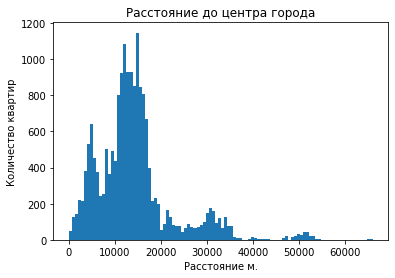

In [111]:
plt.hist(data['city_centers_nearest'], bins=100, range=(0,66000))
plt.title('Расстояние до центра города')
plt.xlabel('Расстояние м.')
plt.ylabel('Количество квартир')
plt.show()

***В среднем квартиры из данных объявлений находятся на расстоянии около 13 км от центра города.***

<font size="4"><font color=blue>Число парков в радиусе 3 км (parks_around_3000)</font>

In [112]:
data['parks_around_3000'].describe()

count    23596.000000
mean         0.466986
std          0.746008
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64

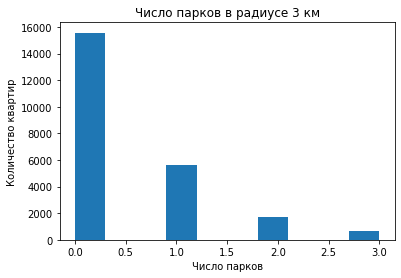

In [113]:
plt.hist(data['parks_around_3000'], range=(0,3))
plt.title('Число парков в радиусе 3 км')
plt.xlabel('Число парков')
plt.ylabel('Количество квартир')
plt.show()

<font size="4"><font color=blue>Расстояние до ближайшего водоёма (ponds_nearest), (м)</font>

In [114]:
data['ponds_nearest'].describe()

count    9044.000000
mean      518.828284
std       277.943715
min        13.000000
25%       295.000000
50%       503.000000
75%       731.250000
max      1344.000000
Name: ponds_nearest, dtype: float64

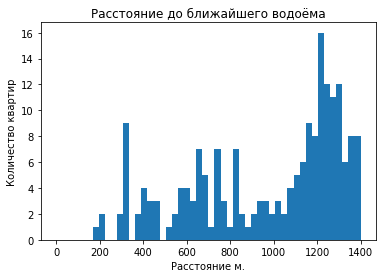

In [115]:
plt.hist(data['city_centers_nearest'], bins=50, range=(0,1400))
plt.title('Расстояние до ближайшего водоёма')
plt.xlabel('Расстояние м.')
plt.ylabel('Количество квартир')
plt.show()

***В среднем квартиры из данных объявлений находятся на расстоянии около 500 км от водоёма.***

<font size="4"><font color=blue>Число водоёмов в радиусе 3 км (ponds_around_3000)</font>

In [116]:
data['ponds_around_3000'].describe()

count    23596.000000
mean         0.587896
std          0.881221
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64

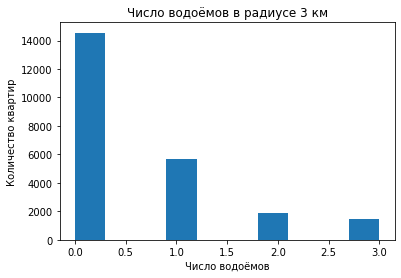

In [117]:
plt.hist(data['ponds_around_3000'], range=(0,3))
plt.title('Число водоёмов в радиусе 3 км')
plt.xlabel('Число водоёмов')
plt.ylabel('Количество квартир')
plt.show()

***Значительное количество квартир находятся дальше 3 км от водоема. Но есть и квартиры с 3 водоемами поблизости.***

<font size="4"><font color=blue>Расстояние до ближайшего парка (parks_nearest), (м)</font>

In [118]:
data['parks_nearest'].describe()

count    8027.000000
mean      491.190607
std       343.009248
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

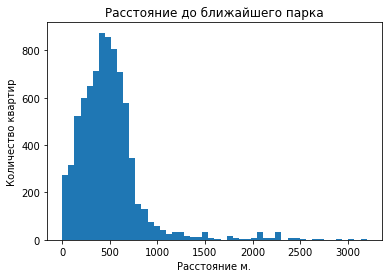

In [119]:
plt.hist(data['parks_nearest'], bins=50, range=(0,3200))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние м.')
plt.ylabel('Количество квартир')
plt.show()

***Наблюдаем, что в среднем квартиры находятся на расстоянии 450 метров от парка.***

<font size="4"><font color=blue>Сколько дней было размещено объявление (days_exposition) (от публикации до снятия)</font>

***На наличие пропусков в данных значениях мы пока обращать внимание не будем.*** 

In [120]:
data['days_exposition'].describe()

count    20423.000000
mean       180.482936
std        219.597126
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

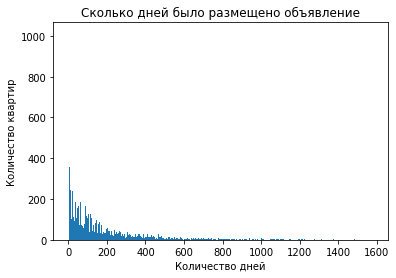

In [121]:
plt.hist(data['days_exposition'], bins=1000)
plt.title('Сколько дней было размещено объявление')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

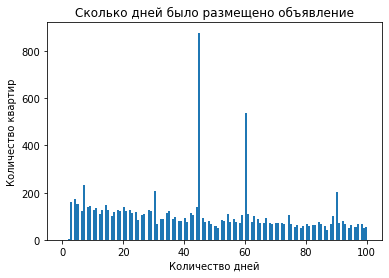

In [122]:
plt.hist(data['days_exposition'], bins=150, range=(0,100))
plt.title('Сколько дней было размещено объявление')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

***Мы выяснили, что медианное время продажи - 95 дней, а среднее время продажи - 180 дней. Замечаем, что на 45 и на 60 день попадает всплеск продаж квартир.***

<font size="4"><font color=blue>2.	Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.</font> 
-	Построим гистограмму.
-	Посчитаем среднее и медиану.
-	В ячейке типа markdown опишем, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими.

In [123]:
data['days_exposition'].describe()

count    20423.000000
mean       180.482936
std        219.597126
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

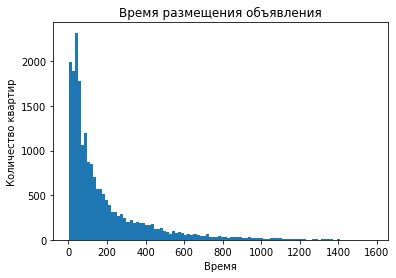

In [124]:
plt.hist(data['days_exposition'], bins=100)
plt.title('Время размещения объявления')
plt.xlabel('Время')
plt.ylabel('Количество квартир')
plt.show()

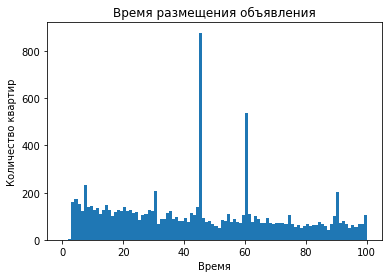

In [125]:
plt.hist(data['days_exposition'], bins=100, range=(0,100))
plt.title('Время размещения объявления')
plt.xlabel('Время')
plt.ylabel('Количество квартир')
plt.show()

***Подмечено, что основная масса квартир продается за первые 100 дней. Медианное время продажи - 95 дней. Среднее время продажи - 181 день. Быстрой продажей можно назвать срок в 45 дней и меньше. Долгой продажей - 230 дней (7,5 месяцев) и дольше. Заметно выделяются сроки пребывания объявления до снятия это 45 и 60 дней. Это может быть обусловленно и с правилами пребывания объявления, а квартиры были незадолго до момента снятия объявления проданы.*** 

<font size="4"><font color=blue>Рассмотрим соотношение стоимости квартир и  их общей площади:</font>

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

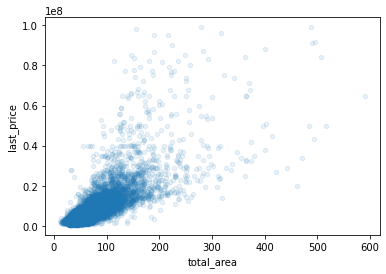

In [126]:
data.plot(x='total_area', y='last_price', kind="scatter", alpha=0.1)

In [127]:
print(data['total_area'].corr(data['last_price']))

0.7680940138685254


***Корреляция в 0.79 говорит о наличии связи между соотношением стоимости квартир и их общей площади. Замечаем, что для квартир с небольшой общей площадью, значения стоимости квартир близко друг к другу. А вот для квартир элитного класса с большой площадью заметно значительное расхождение по стоимости квартиры в Санкт-Петербурге.***

<font size="4"><font color=blue>Рассмотрим соотношение стоимости квартир и жилой площади:</font>

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

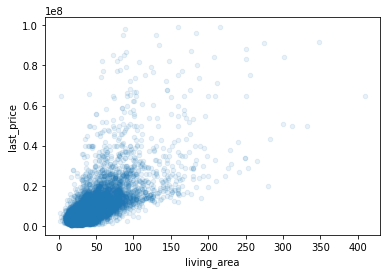

In [128]:
data.plot(x='living_area', y='last_price', kind="scatter", alpha=0.1)

In [129]:
print(data['living_area'].corr(data['last_price']))

0.6894000658048485


***Корреляция в 0.69 говорит о наличии связи между соотношщением стоимости квартир и жилой площадью, но менее выражено. Замечаем, что для квартир с небольшой жилой площадью, значения стоимости квартир близко друг к другу. А вот для квартир элитного класса с большой площадью заметно значительное расхождение по стоимости квартиры в Санкт-Петербурге.***

<font size="4"><font color=blue>Рассмотрим соотношение стоимости квартир и площади кухни:</font>

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

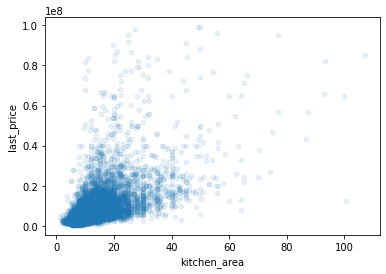

In [130]:
data.plot(x='kitchen_area', y='last_price', kind="scatter", alpha=0.1)

In [131]:
print(data['kitchen_area'].corr(data['last_price']))

0.6135557740648546


***Корреляция в 0.61 говорит о наличии связи между соотношщением стоимости квартир и площадью кухни, но ещё менее выражена зависимость. Замечаем, что для квартир с небольшой жилой площадью, значения стоимости квартир близко друг к другу. А вот для квартир элитного класса с большой площадью заметно значительное расхождение по стоимости квартиры в Санкт-Петербурге.***

<font size="4"><font color=blue>Рассмотрим соотношение стоимости квартир и количества комнат в них:</font>

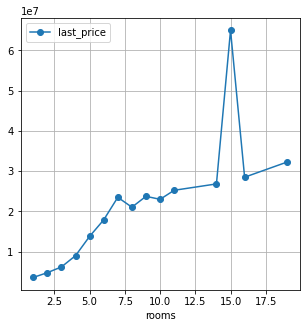

In [132]:
data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

***Замечаем на гистограмме, что чем больше число комнат, тем выше стоимость квартитр. Увеличение числа комнат естественно влияет на увеличение площади, а значит и стоимости квартир.***

<font size="4"><font color=blue>Рассмотрим соотношение стоимости квартир и даты публикации объявления:</font>

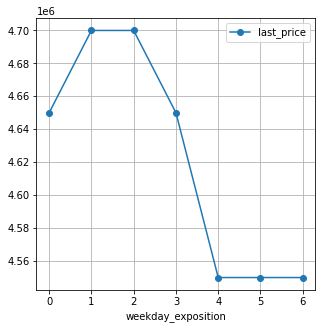

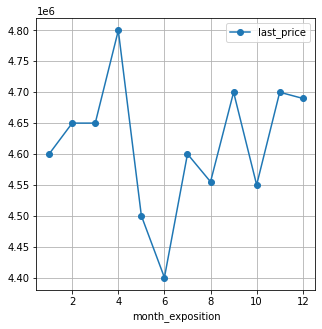

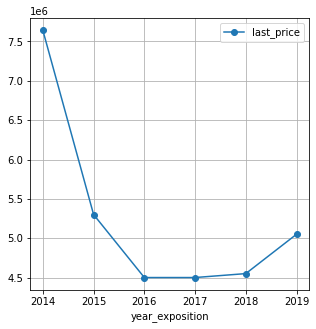

In [133]:

data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
data.pivot_table(index='month_exposition', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
data.pivot_table(index='year_exposition', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

***Наблюдаем резкое снижение стоимости квартир начиная с 2014 года и только с 2017 года идет плавное увеличение 
стоимости, а значит и восстановление спроса. Это может быть обусловленно началом в этот период 
экономических сложностей в отечественной экономике и параллельным кризисом с торговом взаимодействием с западом. 
Экономика Санкт-Петербурга более других вовлечена в торговлю с Европой. В апреле стоимость квартир на максимуме спроса. 
К началу лета уже спрос на квартиры падает и стоимость квартир опускается до годового минимума.***

<font size="4"><font color=blue>4.	Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные найдем по имени в столбце locality_name.</font>

In [134]:
city_to_m = data.pivot_table(index = 'locality_name', values = 'price_to_m', aggfunc=['count', 'mean'])
city_to_m.columns = ['count', 'mean']
city_to_m = city_to_m.sort_values('count', ascending = False).head(10)
city_to_m = city_to_m[(city_to_m['mean'] == city_to_m['mean'].max()) | (city_to_m['mean'] == city_to_m['mean'].min())]
display(city_to_m.style.format("{:.1f}").background_gradient(cmap='Blues', axis=1))

,count,mean
locality_name,,
Санкт-Петербург,15671.0,113555.0
Выборг,237.0,58141.9


***Мы рассмотрели стоимость 1 кв.м из числа первой десятки по количеству объявлений. Выяснилось, что среди них самая высокая стоимость 113555 рублей за 1 кв.м в городе Санкт-Петербург. А последним в этой десятке идет со стоимостью 58142 рубля в городе Выборг. Средняя стоимость в Выборге в 2 раза ниже, чем в Санкт-Петербурге.***

<font size="4"><font color=blue>5.	Построим столбчатую диаграмму стоимости квадратного метра по топ 10 населенным пунктам.</font>

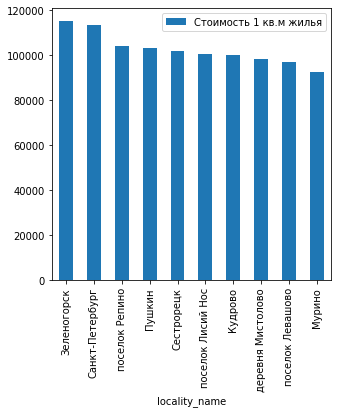

In [135]:
city_price = data.pivot_table(index = 'locality_name', values = 'price_to_m', aggfunc=['mean'])
city_price.columns = ['Стоимость 1 кв.м жилья']
city_price = city_price.sort_values('Стоимость 1 кв.м жилья', ascending = False).head(10)
city_price.plot(kind='bar', figsize=(5, 5))
plt.show()

***В данном исследовании мы рассмотрели стоимость 1 кв.м площади квартир из объявлений и выделили из них первую десятку. Оказалось, что самая дорогая в среднем стоимость за 1 кв.м жилья в городе Зеленогорск, а не в Санкт-Петербурге. А он уже идёт следом на 2 месте.***

<font size="4"><font color=blue>6.	Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.</font>

,price_to_m
city_centers_nearest_km,
0.0,231768.0
1.0,155255.1
2.0,148261.2
3.0,121387.5
4.0,128455.7
5.0,137557.9
6.0,145849.0
7.0,152927.8
8.0,124301.2


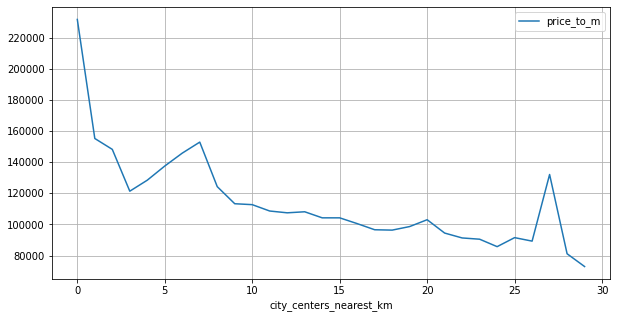

In [136]:
city_to_km = data[data['locality_name'] == 'Санкт-Петербург']

city_to_km = city_to_km.pivot_table(index = 'city_centers_nearest_km', values= 'price_to_m', aggfunc='mean')

display(city_to_km.style.format("{:.1f}").background_gradient(cmap='Blues', axis=1))

city_to_km.plot(figsize=(10,5), grid=True)
plt.show()

***Высчитаем корреляцию по соотношению стоимости 1 кв.м. квартиры от удаленности от центра***

In [137]:
print(data['city_centers_nearest_km'].corr(data['price_to_m']))

-0.3625553430234134


***Отмечаем слабую корреляцию между стоимостью 1 кв.м общей площади квартир и удаленностью от центра. Это связано с наличием дорогих элитных квартир по мере приближения к центру Санкт-Петербурга. И стоимость квартир там может значительно отличаться друг от друга.***

### Общий вывод

<font size="4"><font color=blue>Мы определили, что датафрейм содержит объявления о продаже недвижимости в Санкт-Петербурге и области за период с 27 ноября 2014 по 3 мая 2019 годов. Резкий рост продаж начался с февраля 2017 года. Мы убрали артефакты, частично заполнили пропуски в данных, изменили формат столбцов.
    
- При анализе значений по стоимости квартир были удалены 0.15% данных принятые за артефакты. Что значительно меньше допустимых 10%.
- Самое распростроненное количество фотографий это от 5 до 10 в одном объявлении. Пропусков в значениях количества фотографий нету, но есть объявления с нулевым количеством фотографий. Количество объявлений без фотографий 1054, что составляет 0.45% от общего числа объявлений.
- Выяснили, что средняя цена в объявлениях около 6,5 млн. руб.  
- Самые распространенные квартиры с площадью 45 кв.м. 
- Наблюдаем также, что преобладают квартиры с высотой потолка 2.65 м. 
- Самые распространённые кухни площадью от 5 до 15 кв.метров. 
- Отметили по гистограмме значительное преобладание 5-этажных зданий. Наследие Хрущева. И 9-этажных зданий. Наследие Брежневских времён.
- Мы выяснили, что медианное время продажи - 95 дней
- Корреляция в 0.79 говорит о наличии связи между соотношщением стоимости квартир и их общей площади.Замечаем, что для квартир с небольшой общей площадью, значения стоимости квартир близко друг к другу. А вот для квартир элитного класса с большой площадью заметно значительное расхождение по стоимости квартиры в Санкт-Петербурге
- Заметили резкое снижение стоимости квартир начиная с 2014 года и только с 2017 года идет плавное увеличение стоимости, а значит и восстановление спроса
- Отметили слабую корреляцию между стоимостью 1 кв.м общей площади квартир и удаленностью от центра. Это связано с наличием дорогих элитных квартир по мере приближения к центру Санкт-Петербурга.
- Исследование показало, что самая дорогая стоимость 1 кв.м жилья в городе Зеленогорск, а не в Санкт-Петербурге. А Санкт-Петербург по стоимости уже идёт следом на 2 месте.</font>